<a href="https://colab.research.google.com/github/ducbao811/Multi_Disciplinary_Project/blob/master/Deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Problem 1]

In [1]:
import numpy as np

In [26]:
class FC:
    """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2
    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # Initialize
        # Initialize self.W and self.B using the initializer method
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.W = initializer.W(self.n_nodes1, self.n_nodes2)
        self.b = initializer.B(self.n_nodes2)
        self.HB = 0
        self.HW = 0
        self.optimizer = optimizer
      
    def forward(self, X):
        """
        forward
        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """ 
        self.Z = X       
        A = X @ self.W + self.b
        return A
    def backward(self, dA):
        """
        Backward
        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward
        """
        # Calculate dB and dW for updating
        self.dB = np.sum(dA,axis=0)
        self.dW = self.Z.T @ dA
        self = self.optimizer.update(self)
        return dA @ self.W.T


# [Problem 2]

In [4]:
class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution
    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma
    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer
        Returns
        ----------
        W :
        """
        self.W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return self.W
    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer
        Returns
        ----------
        B :
        """
        self.B = self.sigma * np.random.rand(1,n_nodes2)
        return self.B


# [Problem 3]

In [12]:
class SGD:
    """
    Stochastic gradient descent
    Parameters
    ----------
    lr : Learning rate
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        """
        Update weights and biases for a layer
        Parameters
        ----------
        layer : Instance of the layer before update
        """
        layer.W -= self.lr * layer.dW
        layer.b -= self.lr * layer.dB

        return layer
        

# [Problem 4]

In [6]:
# Tanh activation function
class Tanh:

  def forward(self, A):
    self.A = A
    return np.tanh(self.A)

  def backward(self, dZ):
    return dZ * (1 - np.tanh(self.A) ** 2)

In [7]:
class Softmax:

  def forward(self, A):
    return np.exp(A) / np.sum(np.exp(A),axis=1).reshape(-1,1)\

  def backward(self, Z, y):
    return (Z - y) / len(y)

# [Problem 5]

In [8]:
class ReLU:

  def forward(self, A):
    self.A = A
    return np.maximum(self.A, 0)

  def backward(self, dZ):
    return dZ * np.where(self.A > 0, 1, 0)

# [Problem 6]

In [9]:
class XavierInitializer:
  def W(self, n_nodes1, n_nodes2):
      """
      Weight initialization
      Parameters
      ----------
      n_nodes1 : int
        Number of nodes in the previous layer
      n_nodes2 : int
        Number of nodes in the later layer
      Returns
      ----------
      W :
      """
      self.sigma = 1 / np.sqrt(n_nodes1)
      self.W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
      return self.W

  def B(self, n_nodes2):
      """
      Bias initialization
      Parameters
      ----------
      n_nodes2 : int
        Number of nodes in the later layer
      Returns
      ----------
      B :
      """
      self.B = self.sigma * np.random.rand(1,self.n_nodes2)
      return self.B

In [37]:
class HeInitializer:

  def __init__(self, sigma):
    pass

  def W(self, n_nodes1, n_nodes2):
      """
      Weight initialization
      Parameters
      ----------
      n_nodes1 : int
        Number of nodes in the previous layer
      n_nodes2 : int
        Number of nodes in the later layer
      Returns
      ----------
      W :
      """
      self.sigma = np.sqrt(2/n_nodes1)
      self.W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
      return self.W

  def B(self, n_nodes2):
      """
      Bias initialization
      Parameters
      ----------
      n_nodes2 : int
        Number of nodes in the later layer
      Returns
      ----------
      B :
      """
      self.B = self.sigma * np.random.rand(1,n_nodes2)
      return self.B

# [Problem 7]

In [16]:
class AdaGrad:
    def __init__(self, lr):
        self.lr = lr
        self.delta = 1e-7
    def update(self, layer):
        """
        Update weights and biases for a layer
        Parameters
        ----------
        layer : Instance of the layer before update
        """
        # Update sum of squares of the gradient including the current iteration 
        layer.HW += layer.dW * layer.dW
        layer.HB += layer.dB * layer.dB

        # Update parameters
        layer.W -= self.lr * layer.dW / (np.sqrt(layer.HW) + self.delta)
        layer.b -= self.lr * layer.dB / (np.sqrt(layer.HB) + self.delta)

        return layer

# [Problem 8]

In [17]:
class GetMiniBatch:
    """
Iterator to get a mini-batch
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random number seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


In [41]:
class ScratchSimpleDeepNeuralNetrowkClassifier():
    """
    Simple three-layer neural network classifier
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, verbose = False, bias = True, lr =0.01, n_features = 784,
                 n_nodes1 = 400, n_nodes2 = 200, n_output = 10, sigma = 0.02, 
                 activate_func = Tanh, initializer = SimpleInitializer, optimizer=SGD):
        self.verbose = verbose
        self.has_bias = bias
        self.lr = lr
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.activation_function = activate_func
        self.batch_size = 20
        self.epoch = 10
        self.sigma = sigma
        self.initializer = initializer
        self.optimizer = optimizer

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        self.training_loss = []
        self.testing_loss = []

        # Initilize optimizer and layers
        optimizer = self.optimizer(self.lr)
        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activation_function()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activation_function()
        self.FC3 = FC(self.n_nodes2, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation3 = Softmax()

        for i in range (self.epoch):
          
          get_mini_batch = GetMiniBatch(X,y,batch_size=20)

          for mini_X_train, mini_y_train in get_mini_batch:
              self.forward_propagation(mini_X_train)
              self.backward_propagation(mini_X_train, mini_y_train)

          self.forward_propagation(X)
          self.training_loss.append(self._cross_entropy(y,self.Z3))

          if X_val is not None:
            self.forward_propagation(X_val)
            self.testing_loss.append(self._cross_entropy(y_val,self.Z3))
          
          if self.verbose:
            print("Epoch {}:\nTraining_loss: {}".format(i,self.training_loss[-1]))
            if X_val is not None:
              print("Validation loss: {}".format(self.testing_loss[-1]))

    def forward_propagation(self, X):
        """
        Implement forward propagation when training neural network
        """
        self.A1 = self.FC1.forward(X)
        self.Z1 = self.activation1.forward(self.A1)
        self.A2 = self.FC2.forward(self.Z1)
        self.Z2 = self.activation2.forward(self.A2)
        self.A3 = self.FC3.forward(self.Z2)
        self.Z3 = self.activation3.forward(self.A3)

    def backward_propagation(self, X, y):
        """
        Implement backward propagation 
        """
        dA3 = self.activation3.backward(self.Z3, y) # The cross entropy error and softmax are matched.
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1)
 


    def _cross_entropy(self, y, Z):
        return -np.sum(y*np.log(Z)) / len(y)


    def predict(self, X):
        """
        Estimate using a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result
        """
        self.forward_propagation(X)
        return np.argmax(self.Z3,axis=1)

# [Problem 9]

In [19]:
# Importing dataset

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshaping for fitting
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Coverting value to 0 and 1
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

11501568/11490434 [==============================] - 0s 0us/step


In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [21]:
# Splitting data for training and validation
from sklearn.model_selection import train_test_split
X_training, X_val, y_training, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_training.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_training.shape)

(48000, 784)
(12000, 784)
(48000, 10)


Estimation using default settings

In [42]:
model = ScratchSimpleDeepNeuralNetrowkClassifier(verbose=True)
model.fit(X_training,y_training, X_val, y_val)

Epoch 0:
Training_loss: 0.4337398038529202
Validation loss: 0.46044062707925254
Epoch 1:
Training_loss: 0.3290776257150046
Validation loss: 0.36067001367684626
Epoch 2:
Training_loss: 0.2898075310193911
Validation loss: 0.32495545415956867
Epoch 3:
Training_loss: 0.26520804395411496
Validation loss: 0.3030450411149202
Epoch 4:
Training_loss: 0.24612022559809577
Validation loss: 0.28601522906648397
Epoch 5:
Training_loss: 0.2291567092482859
Validation loss: 0.2705681249306762
Epoch 6:
Training_loss: 0.2132866807369547
Validation loss: 0.2558326657325981
Epoch 7:
Training_loss: 0.1984141286714283
Validation loss: 0.24184375357288848
Epoch 8:
Training_loss: 0.18470287712340117
Validation loss: 0.22885199814811355
Epoch 9:
Training_loss: 0.17224536478072938
Validation loss: 0.21701813848362944


Estimation using ReLU as activation function, He as initilizer and AdaGrad as optimizer

In [43]:
enhanced_model = ScratchSimpleDeepNeuralNetrowkClassifier(verbose=True, initializer=HeInitializer, optimizer=AdaGrad, activate_func=ReLU)
enhanced_model.fit(X_training,y_training, X_val, y_val)

Epoch 0:
Training_loss: 0.3014363629438963
Validation loss: 0.35545949877867256
Epoch 1:
Training_loss: 0.2221079638560025
Validation loss: 0.27695787526008925
Epoch 2:
Training_loss: 0.1904650315910542
Validation loss: 0.24552657826035662
Epoch 3:
Training_loss: 0.1702010339717706
Validation loss: 0.2258927062493823
Epoch 4:
Training_loss: 0.1529140018190254
Validation loss: 0.20937004079293597
Epoch 5:
Training_loss: 0.14034033873887594
Validation loss: 0.1976637767686007
Epoch 6:
Training_loss: 0.13079187910112341
Validation loss: 0.18906975065385886
Epoch 7:
Training_loss: 0.12271081679189194
Validation loss: 0.18168929332358139
Epoch 8:
Training_loss: 0.11628844275409395
Validation loss: 0.1760809704967104
Epoch 9:
Training_loss: 0.11029481519497504
Validation loss: 0.17089411259315504


Accuracy score and learning curve for both models

In [44]:
from sklearn.metrics import accuracy_score

training_pred_default = model.predict(X=X_train)
test_pred_default = model.predict(X=X_test)
training_pred_enhanced = enhanced_model.predict(X=X_train)
test_pred_enhanced = enhanced_model.predict(X=X_test)

print("Accuracy score for training set with default model: {}".format(accuracy_score(y_true=y_train, y_pred=training_pred_default)))
print("Accuracy score for testing set with default model: {}".format(accuracy_score(y_true=y_test,y_pred=test_pred_default)))
print("Accuracy score for training set with enhanced model: {}".format(accuracy_score(y_true=y_train, y_pred=training_pred_enhanced)))
print("Accuracy score for testing set with enhanced model: {}".format(accuracy_score(y_true=y_test,y_pred=test_pred_enhanced)))

Accuracy score for training set with default model: 0.94755
Accuracy score for testing set with default model: 0.9441
Accuracy score for training set with enhanced model: 0.9641
Accuracy score for testing set with enhanced model: 0.9578


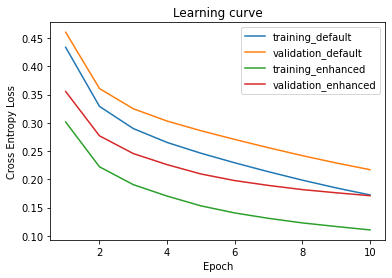

In [46]:
# Plotting learning curve
import matplotlib.pyplot as plt
  
plt.plot(range(1,model.epoch+1),model.training_loss, label="training_default")
plt.plot(range(1,model.epoch+1),model.testing_loss, label="validation_default")
plt.plot(range(1,enhanced_model.epoch+1),enhanced_model.training_loss, label="training_enhanced")
plt.plot(range(1,enhanced_model.epoch+1),enhanced_model.testing_loss, label="validation_enhanced")

plt.xlabel('Epoch')

plt.ylabel('Cross Entropy Loss')
  
plt.legend()
plt.title('Learning curve')
  
plt.show()